In [105]:
import pandas as pa
from pybacktest.ami_funcs import ExRem
## NOTE: `optstuff` is an .ipynb file.
_run_dbg = False  ## Disable it in the optstuff.ipynb
%run optstuff.ipynb
#import optstuff
#reload(optstuff)
#from optstuff import *
from IPython.display import HTML
import matplotlib as plt

In [62]:
pd = (
    pa.DataFrame.from_csv('/home/mad/Options/QNG#_D.csv')
    .sort_index()
    .rename(columns=dict(Open='O', High='H', Low='L', Settle='C', Volume='V')))
pd['Mean'] = pa.rolling_mean(pd.C, 20)
pd = pd.dropna()
pd['Cond1'] = pd.C > pd.Mean
## Unnecessary
expiration_dates = set(simple_expiration_date(v, skip_days=3) for v in pd.index)
pd['Expiries'] = pd.index.map(lambda v: v in expiration_dates)
pd['Exit'] = pd.Expiries
pd['Buy'] = ExRem(pd.Cond1, pd.Exit)
#pd[pd.Buy].head(10)

In [63]:
H = lambda df: HTML(pd.tail(400).to_html())
tt = H(pd)
#tt

In [64]:
pd2 = pd.ix[pd.Buy == True]
pd2['Profit'] = 0
pd2 = pd2.copy()
# pd2.Profit.apply(lambda option_profit(symbol='QNG', date = pd.index, price = pd2.C, opt_type='C', distance=5, debug=0, base_active=qng_ba))

In [126]:
_res = []
import pdb
import traceback
import sys
for idx in pd2.index:
    row = pd2.ix[idx]
    _p = dict()
    _p1 = _p2 = None
    kwa = dict(
        symbol='QNG',
        date=row.name.date(),  #idx.date(),
        price=Decimal(row.C),
        opt_type='C',
        debug=0,
        return_all=True,
        base_active=pd)
    try:
        _p1 = option_profit(distance=0, direction=1, **kwa)
    except NoData:
        pass
    try:
        _p2 = option_profit(distance=3, direction=-1, **kwa)
    except NoData:
        pass

    if _p1:
        _p.update(
            close_date=_p1['close_date'],
            ba_on_close_price=_p1['ba_on_close'].C,
            ba_on_close_date=_p1['ba_on_close'].name,
            central_strike=_p1['optinfo']['strike'],
            central_opt_price=_p1['opt_price'],            
            o1_profit = _p1['profit'],
        )
    if _p2:
        _p.update(
            strike=_p2['optinfo']['strike'],
            opt_price=_p2['opt_price'],
            o2_profit = _p2['profit'],
            close_date_check=_p2['close_date'],
        )
    if _p1 and _p2:
        _p.update(
            profit=_p1['profit'] + _p2['profit'],
        )

    ## option_profit returns:
    ''' return dict(
            profit=profit,
            close_date=close_date,
            optinfo=optinfo,
            opt_a=opt_a,
            opt_b=opt_b,
            ba_on_close=ba_on_close,
            opt_price=opt_price,
        )'''
    _res.append((idx, _p))

_profits = pa.DataFrame([v for k, v in _res], index=[k for k, v in _res])

pd2['close_date'] = _profits['close_date']
pd2['central_strike'] = _profits['central_strike']
pd2['central_strike_price'] = _profits['central_opt_price']
pd2['central_stike_profit'] = _profits['o1_profit']
pd2['2strike'] = _profits['strike']
pd2['2stike_price'] = _profits['opt_price']
pd2['2stike_profit'] = _profits['o2_profit']
pd2['ba_on_close_price'] = _profits['ba_on_close_price']
pd2['ba_on_close_date'] = _profits['ba_on_close_date']
pd2['sum_profit'] = _profits['profit']



In [127]:
_profits.ix['2009-01-01':'2009-12-31':]

,ba_on_close_date,ba_on_close_price,central_opt_price,central_strike,close_date,close_date_check,o1_profit,o2_profit,opt_price,profit,strike
2009-02-06,2009-04-27,3.253,0.003,3.25,2009-04-27,NaN,1.136244e-16,NaN,NaN,NaN,NaN
2009-03-19,2009-04-27,3.253,0.003,3.25,2009-04-27,NaN,1.136244e-16,NaN,NaN,NaN,NaN
2009-05-01,NaT,NaN,NaN,NaN,NaN,2009-05-26,NaN,0.248,0.248,NaN,3.7
2009-05-28,2009-06-25,3.844,0.236,3.95,2009-06-25,2009-06-25,-2.360000e-01,0.182,0.182,-0.054,4.1
2009-06-26,2009-07-28,3.535,0.236,3.95,2009-07-28,2009-07-28,-2.360000e-01,0.268,0.268,0.032,4.1
2009-07-30,2009-08-26,2.910,0.251,3.75,2009-08-26,2009-08-26,-2.510000e-01,0.386,0.386,0.135,3.9
2009-09-10,2009-09-25,3.985,0.123,3.25,2009-09-25,2009-09-25,6.120000e-01,-0.499,0.086,0.113,3.4
2009-09-28,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-10-29,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-11-27,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
pd3 = pd2.ix['2009-01-01':'2009-12-31':]
pd3 = pd3.drop('Profit',1)
H = lambda df: HTML(pd3.head(400).to_html())
tt = H(pd3)
pd3.to_csv('/home/mad/Options/1.csv')
tt

,O,H,L,C,V,Prev. Day Open Interest,Mean,Cond1,Expiries,Exit,Buy,close_date,central_strike,central_strike_price,central_stike_profit,2strike,2stike_price,2stike_profit,ba_on_close,sum_profit,ba_on_close_price,ba_on_close_date
Date,,,,,,,,,,,,,,,,,,,,,,
2009-02-06,4.655,4.837,4.522,4.774,70340,127753,4.75110,True,False,False,True,2009-04-27,3.25,0.003,1.136244e-16,NaN,NaN,NaN,4.174,NaN,3.253,2009-04-27
2009-03-19,3.685,4.424,3.675,4.174,64731,70165,4.02245,True,False,False,True,2009-04-27,3.25,0.003,1.136244e-16,NaN,NaN,NaN,4.174,NaN,3.253,2009-04-27
2009-05-01,3.393,3.591,3.361,3.546,61289,115272,3.54290,True,False,False,True,NaN,NaN,NaN,NaN,3.7,0.248,0.248,NaN,NaN,NaN,NaT
2009-05-28,3.630,3.979,3.572,3.957,78898,140629,3.90925,True,False,False,True,2009-06-25,3.95,0.236,-2.360000e-01,4.1,0.182,0.182,3.957,-0.054,3.844,2009-06-25
2009-06-26,3.873,4.000,3.770,3.949,79686,11403,3.94140,True,False,False,True,2009-07-28,3.95,0.236,-2.360000e-01,4.1,0.268,0.268,3.949,0.032,3.535,2009-07-28
2009-07-30,3.518,3.769,3.499,3.743,86648,177931,3.53350,True,False,False,True,2009-08-26,3.75,0.251,-2.510000e-01,3.9,0.386,0.386,3.743,0.135,2.910,2009-08-26
2009-09-10,2.845,3.320,2.740,3.256,117221,170271,2.94665,True,False,False,True,2009-09-25,3.25,0.123,6.120000e-01,3.4,0.086,-0.499,3.256,0.113,3.985,2009-09-25
2009-09-28,3.965,3.996,3.662,3.730,88091,17907,3.29645,True,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2009-10-29,5.066,5.129,4.941,5.062,111265,151582,4.76595,True,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [130]:
ba_entry = pd.ix['2009-09-10':].iloc[0]
_r = option_profit(
    symbol='QNG', date=ba_entry.name.date(), price=ba_entry.C, opt_type='C',
    distance=0, debug=3, base_active=pd)
print ""
print _r

I: selected option with expiry datetime.date(2009, 9, 25)
I: rounding the strike from 3.2560000000000002 to 3.25
D: lower_strikes: [3.2, 3.15, 3.1, 3.05, 3.0, 2.95, 2.9, 2.85, 2.8]
D: matching_strikes: [3.25]
D: higher_strikes: [3.3, 3.35, 3.4, 3.45, 3.5, 3.55, 3.6, 3.65, 3.7]
loading file: /home/mad/Options/CME/QNG/QNGV09C3250_D.csv
fileinfo: {'load_func': <bound method type.load_func of <class '__main__.OptParserCME'>>, 'symbol': 'QNG', 'opt_type': 'C', 'exp_date': datetime.date(2009, 9, 25), 'strike': 3.25, 'data':                 O      H      L      C    V   OI
timestamp                                       
2009-08-21  0.374  0.375  0.357  0.369   11  253
2009-08-24  0.325  0.325  0.325  0.418    2  262
2009-08-25  0.350  0.360  0.350  0.373    6  314
2009-08-26  0.330  0.340  0.330  0.363    5  320
2009-08-27  0.280  0.280  0.260  0.308    7  325
2009-08-31  0.180  0.200  0.180  0.189    9  381
2009-09-01  0.150  0.150  0.125  0.125    3  389
2009-09-02  0.131  0.140  0.093  0.

In [131]:
print OptParserCME().parse(base_dir + 'CME/QNG/QNGX09C3750_D.csv')
print ""
print OptParserCME.load_func(base_dir + 'CME/QNG/QNGX09C3750_D.csv').head(50)

{'load_func': <bound method type.load_func of <class '__main__.OptParserCME'>>, 'symbol': 'QNG', 'opt_type': 'C', 'exp_date': datetime.date(2009, 10, 27), 'strike': 3.75, 'file_path': '/home/mad/Options/CME/QNG/QNGX09C3750_D.csv'}

               O      H     L      C   V   OI
timestamp                                    
2009-09-03  0.45  0.455  0.44  0.394  14  200
2009-09-04  0.35  0.350  0.35  0.440   1  314
2009-09-08  0.46  0.460  0.46  0.500   1  321


In [132]:
pd.ix['2009-09-25':].iloc[0].C

3.9849999999999999

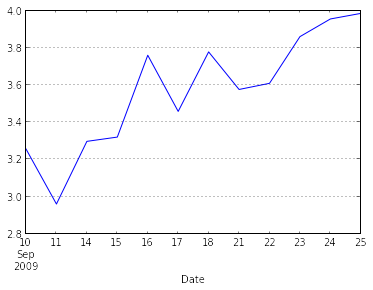

In [109]:
pd.ix['2009-09-10':'2009-09-25'].C.plot(legend=None)